# Backpropagation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
x = torch.tensor(1.0)

y = torch.tensor(2.0)


In [ ]:
def describe_tensor(tensor):
    print("Data:")
    print(tensor.data)
    print("requires_grad:")
    print(tensor.requires_grad)
    print("grad:")
    print(tensor.grad)
    print("grad_fn:")
    print(tensor.grad_fn)
    print("is_leaf")
    print(tensor.is_leaf)


In [ ]:
describe_tensor(x)

Data:
tensor(1.)
requires_grad:
False
grad:
None
is_leaf
True


In [ ]:
z = x*y
describe_tensor(z)

Data:
tensor(2.)
requires_grad:
False
grad:
None
is_leaf
True


In [ ]:
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)
describe_tensor(x)

Data:
tensor(1.)
requires_grad:
True
grad:
None
is_leaf
True


In [ ]:
z = x*y

In [ ]:
z.backward()
print("x")
describe_tensor(x)
print("\ny")
describe_tensor(y)

x
Data:
tensor(1.)
requires_grad:
True
grad:
tensor(2.)
is_leaf
True

y
Data:
tensor(2.)
requires_grad:
True
grad:
tensor(1.)
is_leaf
True


In [ ]:
x = torch.tensor(2.0, requires_grad=True)
z = x**2
z.backward()
describe_tensor(x)

Data:
tensor(2.)
requires_grad:
True
grad:
tensor(4.)
is_leaf
True


In [ ]:
learning_rate = 0.1
x = x - learning_rate*x.grad

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
z = 2*x + x**2 + torch.sigmoid(x)
z.backward()
describe_tensor(x)

Data:
tensor(2.)
requires_grad:
True
grad:
tensor(6.1050)
is_leaf
True


## Multidimensional backpropagation

In [ ]:
x = torch.ones(3, requires_grad=True)
describe_tensor(x)

Data:
tensor([1., 1., 1.])
requires_grad:
True
grad:
None
grad_fn:
None
is_leaf
True


In [ ]:
y = 5*x
describe_tensor(y)

Data:
tensor([5., 5., 5.])
requires_grad:
True
grad:
None
grad_fn:
is_leaf
False


In [ ]:
z = x * y
describe_tensor(z)

Data:
tensor([5., 5., 5.])
requires_grad:
True
grad:
None
grad_fn:
is_leaf
False


In [ ]:
s = z.sum()
describe_tensor(s)

Data:
tensor(15.)
requires_grad:
True
grad:
None
grad_fn:
is_leaf
False


In [ ]:
s.backward()

describe_tensor(x)

Data:
tensor([1., 1., 1.])
requires_grad:
True
grad:
tensor([10., 10., 10.])
grad_fn:
None
is_leaf
True


In [ ]:
describe_tensor(y)

Data:
tensor([5., 5., 5.])
requires_grad:
True
grad:
None
grad_fn:
is_leaf
False


In [ ]:
s.backward()

RuntimeError: ignored

In [ ]:
x = torch.ones(3, requires_grad=True)
y = 3*x
z = x*y

z.backward(torch.tensor([1., 1., 1.]))

In [ ]:
describe_tensor(x)

Data:
tensor([1., 1., 1.])
requires_grad:
True
grad:
tensor([6., 6., 6.])
grad_fn:
None
is_leaf
True


### Exercise 2

The following code will crash for the aforementioned reason (DCG is gone after a `.backward()`). Make use of the `retain_graph` flag in the `backward` call to solve this until you can backprop twice and the `grad` in x is `[6, 6, 6]`.

In [ ]:
# Let's try to backward twice
x = torch.ones(3, requires_grad=True)
y = 3 * torch.ones(3)
z = x * y
print("z: ", z)
# TODO: ??? #
z.backward(torch.tensor([1., 1., 1.]), retain_graph=True)
z.backward(torch.ones(3))
x.grad

z:  tensor([3., 3., 3.], grad_fn=<MulBackward0>)


tensor([6., 6., 6.])

In [ ]:
class Dog:

    def __init__(self, name):
        self.name = name
        print("I'm a new dog")

    def bark(self):
        print("woof")
    
    def my_name(self):
        print(self.name)



In [ ]:
dog2 = Dog("Dani")
dog2.bark()
dog2.my_name()
dog2.name

I'm a new dog
woof
Dani


'Dani'

## Training a Neural Network

In [ ]:
import torch.nn as nn

class MyModel(nn.Module):

    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(3, 20)
        self.act1 = nn.Tanh()

        self.fc2 = nn.Linear(20, 2)

    def forward(self, x):
        h1 = self.act1(self.fc1(x))
        y = self.fc2(h1)

        return y


In [ ]:
net = MyModel()
print(net)

MyModel(
  (fc1): Linear(in_features=3, out_features=20, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=20, out_features=2, bias=True)
)


In [ ]:
describe_tensor(net.fc1.bias)

Data:
tensor([ 0.1758, -0.0324,  0.0216,  0.3915,  0.0179,  0.0656, -0.2121,  0.2723,
         0.4928,  0.2831, -0.0258,  0.2161, -0.5363, -0.1524, -0.1623, -0.4607,
        -0.1350,  0.5299,  0.0530, -0.4841])
requires_grad:
True
grad:
None
grad_fn:
None
is_leaf
True


In [ ]:
params = list(net.parameters())
print([p.shape for p in params])

[torch.Size([20, 3]), torch.Size([20]), torch.Size([2, 20]), torch.Size([2])]


In [ ]:
loss_fn = nn.MSELoss()


In [ ]:
loss_fn

MSELoss()

Summary, we have a model (MyModel) and a loss (MSELoss)

In [ ]:
net = MyModel()
loss_fn = nn.L1Loss()

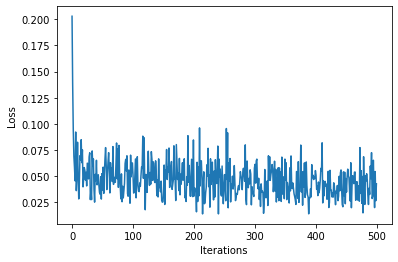

In [ ]:
def train(network, optimizer, loss_fn, num_iters):
    target = torch.zeros(10, 2)
    losses_history = []
    for iter in range(num_iters):
        optimizer.zero_grad()
        # TODO: sample 10 (minibatch size) random samples of dimension expected by NN 
        # https://pytorch.org/docs/stable/torch.html#torch.rand ==> Size [10, 3]
        x = torch.randn(10, 3)

        y = network(x)

        loss = loss_fn(y, target)

        # TODO:
        # 3) Backprop with repsect to the loss function
        loss.backward()

        optimizer.step()
        # p = p - lr*p.grad

        losses_history.append(loss.item())
    
    plt.plot(losses_history)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")

net = MyModel()
optimizer = optim.SGD(net.parameters(), lr=0.1)
train(net, optimizer, loss_fn, 500)

In [ ]:
x = torch.randn(10, 3)

y = net.fc1.weight

print(y)

Parameter containing:
tensor([[-0.0760,  0.2295, -0.3385],
        [ 0.3650,  0.4007,  0.4052],
        [-0.0202,  0.2636, -0.3244],
        [-0.2284, -0.0082,  0.4390],
        [ 0.2591,  0.2077,  0.2704],
        [ 0.1695,  0.2348,  0.1000],
        [ 0.1399, -0.1305, -0.3819],
        [ 0.1409,  0.2164,  0.1041],
        [ 0.2329, -0.1234, -0.0320],
        [ 0.4327,  0.2715, -0.0275],
        [-0.3167, -0.1328,  0.1659],
        [-0.0082,  0.3086, -0.0014],
        [-0.3529, -0.5333,  0.3189],
        [-0.4326,  0.4045,  0.2498],
        [ 0.1571, -0.1585, -0.2469],
        [ 0.5168, -0.3158,  0.4184],
        [-0.2967, -0.4841,  0.2496],
        [ 0.0077, -0.3767,  0.2098],
        [-0.2422, -0.4492, -0.0761],
        [-0.0058,  0.4274,  0.2682]], requires_grad=True)


In [ ]:
net2 = MyModel()
y = net2(x)

print(y)

tensor([[-0.7917,  0.2188],
        [-0.4788, -0.1916],
        [ 0.2245, -0.3454],
        [-0.2243, -0.4203],
        [-0.6604,  0.1307],
        [ 0.0691, -0.1470],
        [-0.6520,  0.3462],
        [-0.2166, -0.0653],
        [ 0.0441,  0.0984],
        [-0.4271, -0.3642]], grad_fn=<AddmmBackward>)
